In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from Analyze_Features import analyze_features

In [2]:
data = pd.read_csv('Loan_Default_Prediction_Analysis.csv')
data.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [3]:
data.isnull().sum()

LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

In [4]:
def clean_dataframe(df):

    df = df.drop_duplicates()
    if 'LoanID' in df.columns:
        df = df.drop(columns=['LoanID'])
    
    return df
data = clean_dataframe(data)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Age             255347 non-null  int64  
 1   Income          255347 non-null  int64  
 2   LoanAmount      255347 non-null  int64  
 3   CreditScore     255347 non-null  int64  
 4   MonthsEmployed  255347 non-null  int64  
 5   NumCreditLines  255347 non-null  int64  
 6   InterestRate    255347 non-null  float64
 7   LoanTerm        255347 non-null  int64  
 8   DTIRatio        255347 non-null  float64
 9   Education       255347 non-null  object 
 10  EmploymentType  255347 non-null  object 
 11  MaritalStatus   255347 non-null  object 
 12  HasMortgage     255347 non-null  object 
 13  HasDependents   255347 non-null  object 
 14  LoanPurpose     255347 non-null  object 
 15  HasCoSigner     255347 non-null  object 
 16  Default         255347 non-null  int64  
dtypes: float64

In [6]:
numeric_features = data.select_dtypes(include=[np.number])
categorical_features = data.select_dtypes(include=[object])

numeric_features = numeric_features.drop(columns=['Default'])
categorical_features['Default'] = data['Default'].astype(str)


In [7]:
print("Numeric Features:\n", numeric_features.columns)
print("\nCategorical Features:\n", categorical_features.columns)

Numeric Features:
 Index(['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed',
       'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio'],
      dtype='object')

Categorical Features:
 Index(['Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage',
       'HasDependents', 'LoanPurpose', 'HasCoSigner', 'Default'],
      dtype='object')


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Income'}>,
        <Axes: title={'center': 'LoanAmount'}>],
       [<Axes: title={'center': 'CreditScore'}>,
        <Axes: title={'center': 'MonthsEmployed'}>,
        <Axes: title={'center': 'NumCreditLines'}>],
       [<Axes: title={'center': 'InterestRate'}>,
        <Axes: title={'center': 'LoanTerm'}>,
        <Axes: title={'center': 'DTIRatio'}>]], dtype=object)

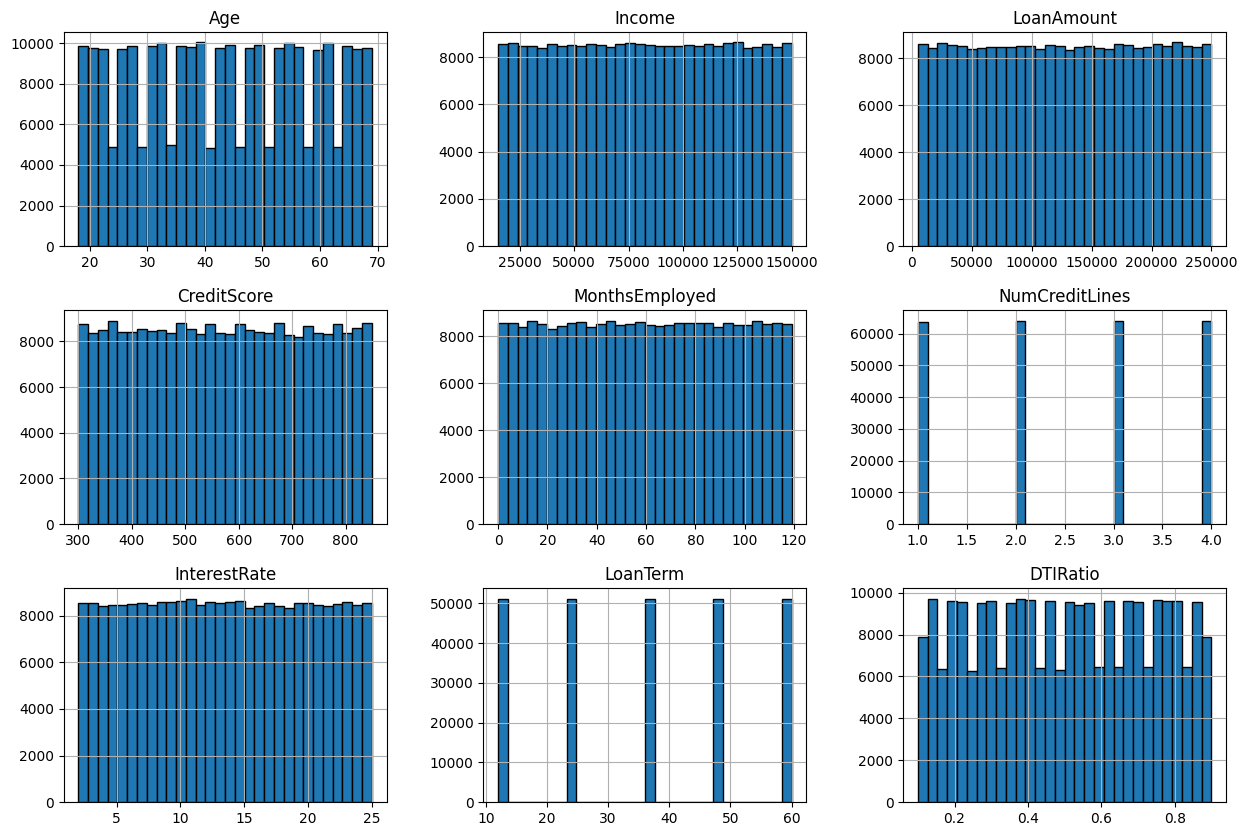

In [8]:
numeric_features.hist(figsize=(15, 10), bins=30, edgecolor='black')

In [9]:
# for column in categorical_features.columns:
#     counts = categorical_features[column].value_counts()

#     # Vẽ pie chart
#     plt.figure(figsize=(6,6))
#     plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'orange'])
#     plt.title(f'Pie Chart của cột {column}')
#     plt.axis('equal') 
#     plt.show()

In [10]:
x = data.drop(columns=['Default'])
y = data['Default']

======== 1. Numeric Features vs Target ========


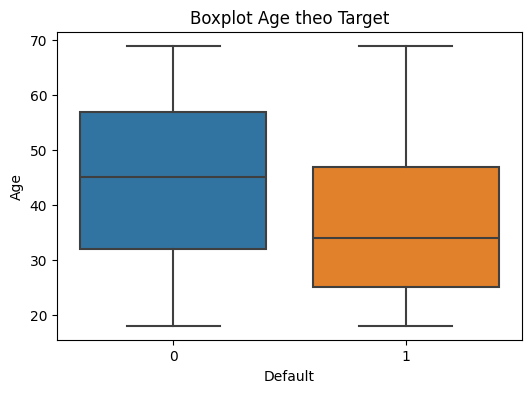

Age: Point Biserial Corr = -0.16778, p-value = 0.0000000000


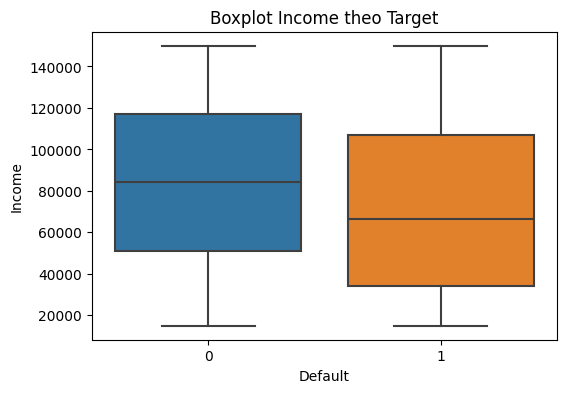

Income: Point Biserial Corr = -0.09912, p-value = 0.0000000000


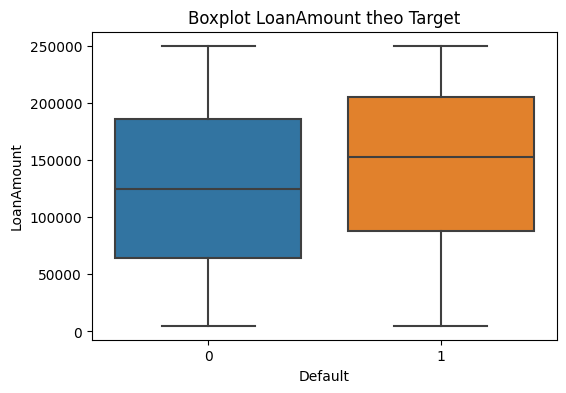

LoanAmount: Point Biserial Corr = 0.08666, p-value = 0.0000000000


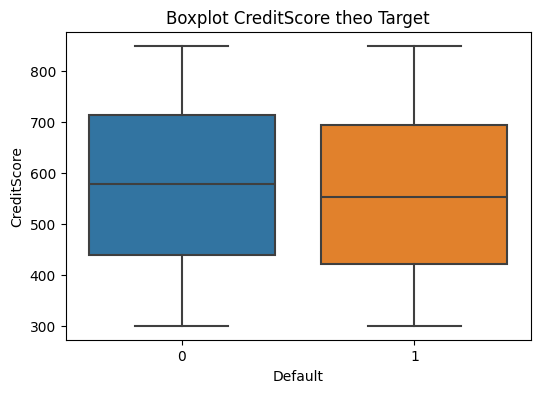

CreditScore: Point Biserial Corr = -0.03417, p-value = 0.0000000000


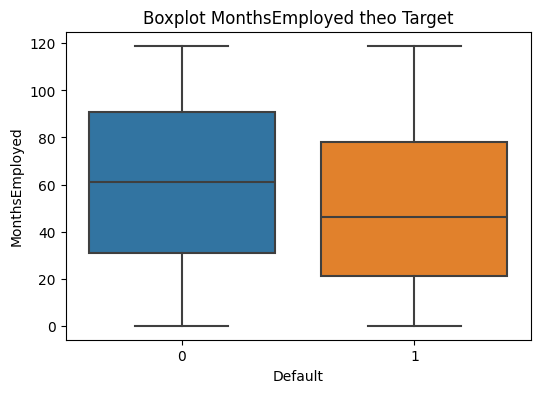

MonthsEmployed: Point Biserial Corr = -0.09737, p-value = 0.0000000000

======== 2. Categorical Features vs Target ========


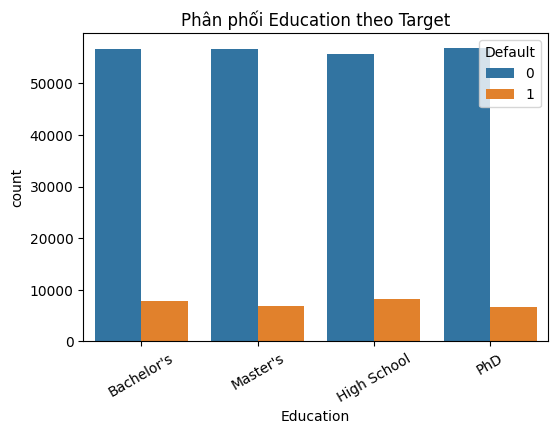

Education: Chi-square test p-value = 0.0000000000


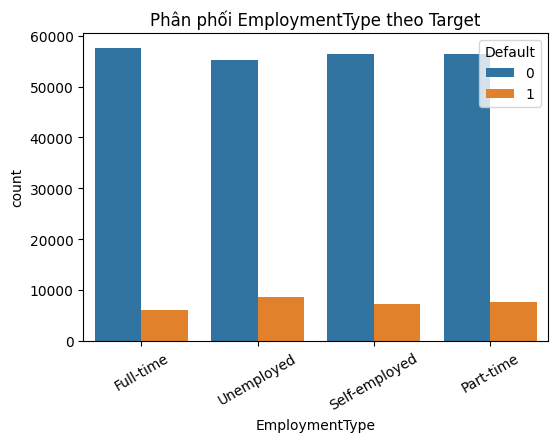

EmploymentType: Chi-square test p-value = 0.0000000000


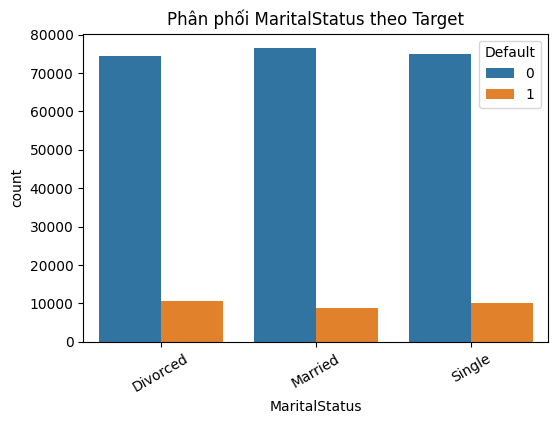

MaritalStatus: Chi-square test p-value = 0.0000000000


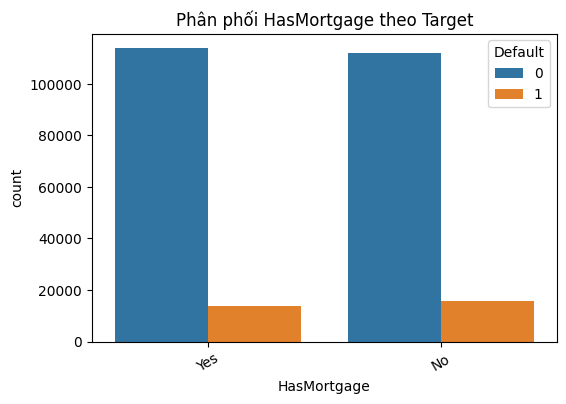

HasMortgage: Chi-square test p-value = 0.0000000000


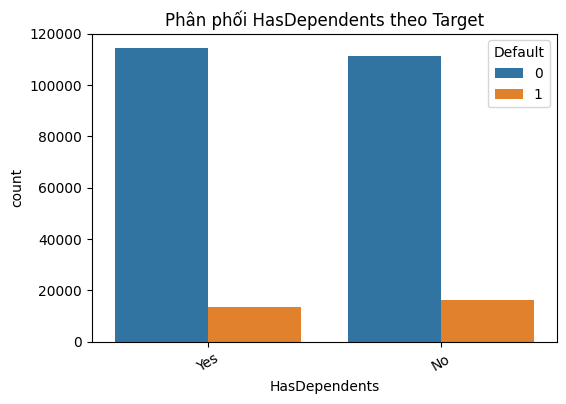

HasDependents: Chi-square test p-value = 0.0000000000

======== 3. Correlation Heatmap (Numeric) ========


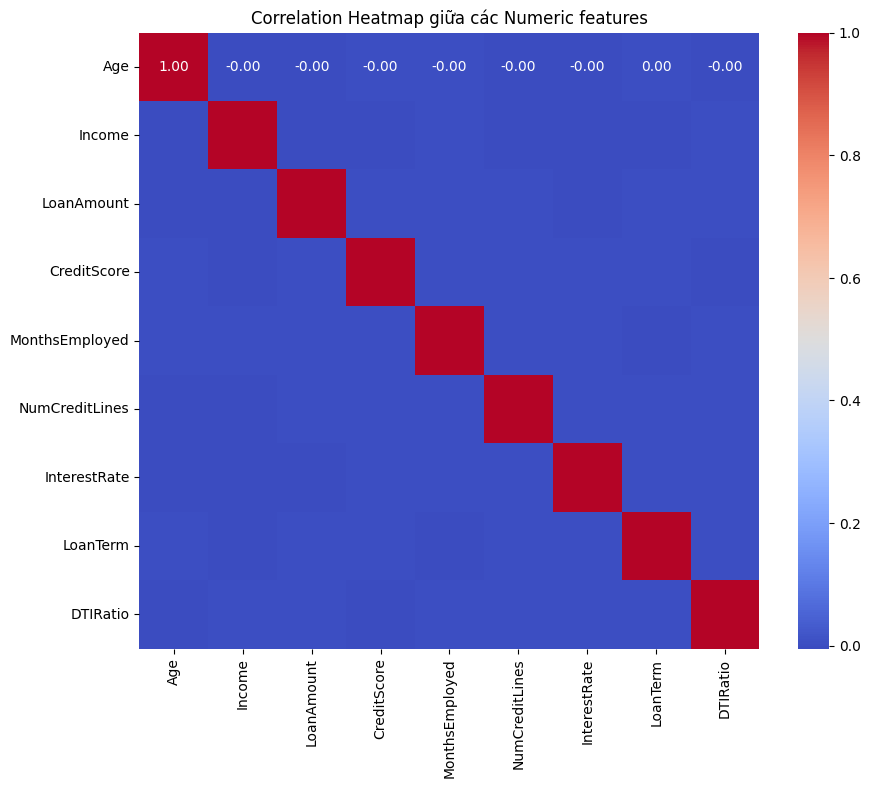

In [11]:
from Analyze_Features import analyze_features
analyze_features(x, y)

In [12]:

x.var(numeric_only=True)



Age               2.247078e+02
Income            1.518116e+09
LoanAmount        5.018406e+09
CreditScore       2.525044e+04
MonthsEmployed    1.200163e+03
NumCreditLines    1.247728e+00
InterestRate      4.404238e+01
LoanTerm          2.879582e+02
DTIRatio          5.332248e-02
dtype: float64

In [19]:
from scipy.stats import pearsonr
for col in x.select_dtypes(include='number').columns:
    corr, pval = pearsonr(x[col], y)
    if pval == 0.0:
        print(f"{col:15} | corr = {corr:.4f} | p-value < 1e-308 (underflow)")
    else:
        print(f"{col:15} | corr = {corr:.4f} | p-value = {pval:.10f}")


Age             | corr = -0.1678 | p-value < 1e-308 (underflow)
Income          | corr = -0.0991 | p-value < 1e-308 (underflow)
LoanAmount      | corr = 0.0867 | p-value < 1e-308 (underflow)
CreditScore     | corr = -0.0342 | p-value = 0.0000000000
MonthsEmployed  | corr = -0.0974 | p-value < 1e-308 (underflow)
NumCreditLines  | corr = 0.0283 | p-value = 0.0000000000
InterestRate    | corr = 0.1313 | p-value < 1e-308 (underflow)
LoanTerm        | corr = 0.0005 | p-value = 0.7831283155
DTIRatio        | corr = 0.0192 | p-value = 0.0000000000


In [13]:
x.describe()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio
count,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000
mean,43.498306,82499.304597,127578.865512,574.264346,59.541976,2.501036,13.492773,36.025894,0.500212
std,14.990258,38963.013729,70840.706142,158.903867,34.643376,1.117018,6.636443,16.969330,0.230917
min,18.000000,15000.000000,5000.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000
25%,31.000000,48825.500000,66156.000000,437.000000,30.000000,2.000000,7.770000,24.000000,0.300000
50%,43.000000,82466.000000,127556.000000,574.000000,60.000000,2.000000,13.460000,36.000000,0.500000
75%,56.000000,116219.000000,188985.000000,712.000000,90.000000,3.000000,19.250000,48.000000,0.700000
max,69.000000,149999.000000,249999.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000


In [14]:
y.value_counts()
# (X_train == X_train.iloc[0]).all()


Default
0    225694
1     29653
Name: count, dtype: int64